<a href="https://colab.research.google.com/github/alberzenon/AprendizajeAutomatico/blob/main/Tema_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Análisis exploratorio de los datos

In [ ]:
data = pd.read_csv('Dataset_Naranjas_Toronjas.csv')

In [ ]:
data.shape

(2000, 3)

In [ ]:
data.head(5)

,Unnamed: 0,diam_fruta,tipo
0,0,12.294948,0.0
1,1,14.376015,0.0
2,2,14.059504,0.0
3,3,13.490633,0.0
4,4,13.847786,0.0


In [ ]:
df = pd.DataFrame(data, columns=['diam_fruta','tipo'])

In [ ]:
df

,diam_fruta,tipo
0,12.294948,0.0
1,14.376015,0.0
2,14.059504,0.0
3,13.490633,0.0
4,13.847786,0.0
...,...,...
1995,16.541757,1.0
1996,16.842392,1.0
1997,16.668466,1.0
1998,18.078923,1.0


## Representación gráfica de los datos con Seaborn

In [ ]:
import seaborn as sns

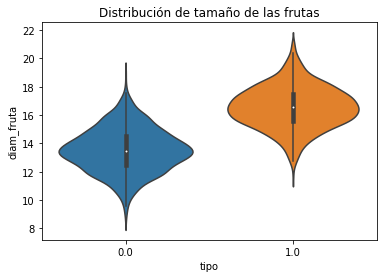

In [ ]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 4))

sns.violinplot(
        x     = 'tipo',
        y     = 'diam_fruta',
        data  = df,
        ax    = ax
    )

ax.set_title('Distribución de tamaño de las frutas');

## Construcción del Modelo de Regresión Lineal

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
diam_fruta = df.iloc[:, 0].to_numpy()
tipo = df.iloc[:, 1].to_numpy()

In [ ]:
diam_fruta

array([12.29494752, 14.37601529, 14.05950392, ..., 16.66846566,
       18.07892314, 16.98964601])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(diam_fruta,tipo, train_size = 0.8 )

In [ ]:
modelo = LogisticRegression()

In [ ]:
modelo_entrenado = modelo.fit(X = x_train.reshape(-1, 1), y = y_train)
modelo_entrenado


LogisticRegression()

In [ ]:
modelo_entrenado.coef_

array([[1.30254213]])

In [ ]:
y_pred = modelo_entrenado.predict(x_test.reshape(-1, 1))

## Evaluación del Modelo

In [ ]:
from sklearn import metrics

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[174,  22],
       [ 32, 172]])

Text(0.5, 15.0, 'Valor Predecido')

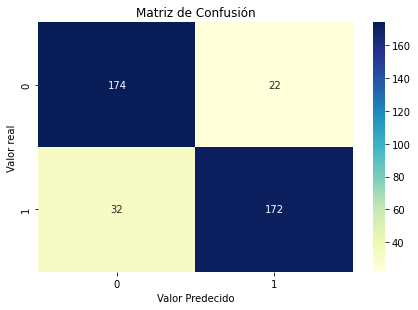

In [ ]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Valor real')
plt.xlabel('Valor Predecido')

In [ ]:
print("Aciertos:",metrics.accuracy_score(y_test, y_pred))
print("Precisión:",metrics.precision_score(y_test, y_pred))

Aciertos: 0.865
Precisión: 0.8865979381443299
